In [21]:
import urllib.request
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from sklearn.decomposition import PCA

In [3]:
def request_raytracer(file, sr, sc, wr, wc, roff, coff):
    x = urllib.request.urlopen("http://localhost/r.html?f=%s&sr=%d&sc=%d&wr=%d&wc=%d&roff=%d&coff=%d" % (file, sr, sc, wr, wc, roff, coff)).read()
    return x

In [3]:
for f in ['test01.txt', 'test02.txt','test03.txt','test04.txt','test05.txt']:
    for i in range(200):
    #     wr, wc = random.randint(10,200), random.randint(10,200)
    #     sr,sc = random.randint(wr,200), random.randint(wc,200)
    #     roff, coff = random.randint(0,sr-wr), random.randint(0, sc-wc)
        p = (i+1)*150
        sr, sc = int(p**0.5), int(p**0.5)
        wr,wc = sr,sc
        roff,coff = 0,0
        request_raytracer(f, sr, sc, wr, wc, roff, coff)


In [12]:
cols = pandas.read_csv('CNV/raytracer-master/stats.txt')
cols.head()

,sc,sr,wc,wr,coff,roff,metric,metric2,time
0,99,80,50,50,35,14,121992,2186810,0.034669
1,89,84,50,50,25,0,117839,2100741,0.030928
2,74,94,50,50,7,18,61685,1909220,0.017400
3,54,84,50,50,3,20,71585,1455463,0.027673
4,56,70,50,50,3,16,65944,1361966,0.028373


In [4]:
from scipy.stats import linregress
def fit_line(x, y):
    """Return slope, intercept of best fit line."""
    # Remove entries where either x or y is NaN.
    clean_data = pandas.concat([x, y], 1).dropna(0) # row-wise
    (_, x), (_, y) = clean_data.iteritems()
    slope, intercept, r, p, stderr = linregress(x, y)
    return slope, intercept # could also return stderr



In [5]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,color='black')


seconds per million dot calls 0.392719417725
seconds per million dot calls 0.227426622281
seconds per million dot calls 0.269909023561
seconds per million dot calls 0.0520148357724
seconds per million dot calls 0.0934299587549


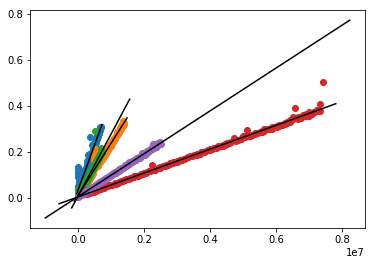

In [7]:
for i in range(5):
    m,b = fit_line(cols['metric'][i*200:(i+1)*200], cols['time'][i*200:(i+1)*200])
    plt.scatter(cols['metric'][i*200:(i+1)*200], cols['time'][i*200:(i+1)*200])
    abline(m,b)
    print('seconds per million dot calls', m*1e6)
plt.show()

milliseconds per million instructions 18.5418118751
milliseconds per million instructions 12.6122751985
milliseconds per million instructions 8.37029902728
milliseconds per million instructions 4.32584919835
milliseconds per million instructions 5.39985961515


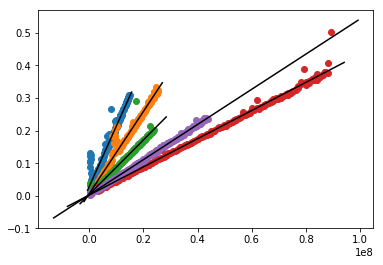

In [9]:
for i in range(5):
    m,b = fit_line(cols['metric2'][i*200:(i+1)*200], cols['time'][i*200:(i+1)*200])
    plt.scatter(cols['metric2'][i*200:(i+1)*200], cols['time'][i*200:(i+1)*200])
    abline(m,b)
    print('milliseconds per million instructions', m*1e9)
plt.show()

instructions per dot call 21.1801923587
instructions per dot call 18.0321703646
instructions per dot call 32.2460428326
instructions per dot call 12.0241953572
instructions per dot call 17.3022939881


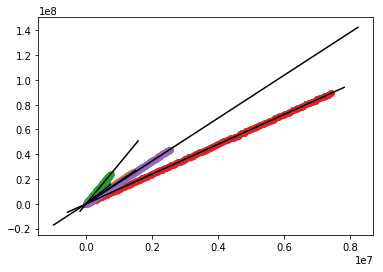

In [10]:
for i in range(5):
    m,b = fit_line(cols['metric'][i*200:(i+1)*200], cols['metric2'][i*200:(i+1)*200])
    plt.scatter(cols['metric'][i*200:(i+1)*200], cols['metric2'][i*200:(i+1)*200])
    abline(m,b)
    print('instructions per dot call', m)
plt.show()

In [111]:
m,b = fit_line(cols['wc'][200:]*cols['wr'][200:], cols['metric'][200:])
plt.scatter(cols['wc'][200:]*cols['wr'][200:], cols['metric'][200:])
abline(m,b)
plt.show()

ValueError: Inputs must not be empty.

seconds per million shade calls 0.75182326573
seconds per million shade calls 0.402169190483
seconds per million shade calls 1.35542550938
seconds per million shade calls 0.0503094638541
seconds per million shade calls 0.140949324249


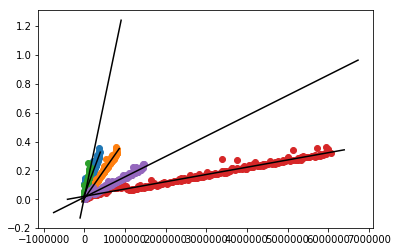

In [189]:
for i in range(5):
    m,b = fit_line(cols['metric'][i*200:(i+1)*200] - 20*cols['metric2'][i*200:(i+1)*200], cols['time'][i*200:(i+1)*200])
    plt.scatter(cols['metric'][i*200:(i+1)*200]- 20*cols['metric2'][i*200:(i+1)*200], cols['time'][i*200:(i+1)*200])
    abline(m,b)
    print('seconds per million shade calls', m*1e6)
plt.show()

In [96]:
print(m,b)

84.5261048672 -30.2527667771


In [196]:
test1 = pandas.read_csv('CNV/raytracer-master/dynamic_12.txt')
test4 = pandas.read_csv('CNV/raytracer-master/dynamic_14.txt')

In [207]:
test4.tail()

,description,value
93,dot,2481121.0
94,dot-instructions,44660178.0
95,raytracerVectorinit,3241776.0
96,raytracerVectorinit-instructions,46850250.0
97,totalinstr,180425569.0


In [206]:
test1.tail()

,description,value
87,dot,234479.0
88,dot-instructions,4220622.0
89,raytracerVectorinit,345305.0
90,raytracerVectorinit-instructions,4867434.0
91,totalinstr,36091288.0


In [210]:
merged_tests = pandas.merge(test1, test4, on='description')

In [213]:
merged_tests['x'] = merged_tests['value_x'] / 3.609129e+07
merged_tests['y'] = merged_tests['value_y'] / 1.804256e+08

In [215]:
merged_tests['x/y'] = merged_tests['x'] / merged_tests['y']

In [221]:
pandas.options.display.max_rows = 999
merged_tests.sort('x/y', ascending=False)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,description,value_x,value_y,x,y,x/y
23,raytracerpigmentsSolidPigmentinit,3.000000e+00,2.000000e+00,8.312255e-08,1.108490e-08,7.498718
24,raytracerpigmentsSolidPigmentinit-instructions,1.800000e+01,1.200000e+01,4.987353e-07,6.650941e-08,7.498718
2,bb/method,2.832278e+01,1.925535e+01,7.847538e-07,1.067218e-07,7.353266
15,readScene,1.000000e+00,1.000000e+00,2.770752e-08,5.542451e-09,4.999145
65,raytracerMatrixinit,3.000000e+04,3.000000e+04,8.312255e-04,1.662735e-04,4.999145
50,getPixelColor-instructions,2.000000e+05,2.000000e+05,5.541503e-03,1.108490e-03,4.999145
66,raytracerMatrixinit-instructions,4.800000e+05,4.800000e+05,1.329961e-02,2.660376e-03,4.999145
3,readVector,1.000000e+00,1.000000e+00,2.770752e-08,5.542451e-09,4.999145
74,debug-instructions,1.200210e+05,1.200210e+05,3.325484e-03,6.652105e-04,4.999145
29,info,2.100000e+01,2.100000e+01,5.818578e-07,1.163915e-07,4.999145


In [68]:
# same window size but different regions

wr,wc = 500,500
for i in range(30):
    sr,sc = random.randint(wr,10000), random.randint(wc,10000)
    roff, coff = random.randint(0,sr-wr), random.randint(0, sc-wc)
    request_raytracer('test01.txt', sr, sc, wr, wc, roff, coff)
    
for f in ['test01.txt', 'test02.txt','test03.txt','test04.txt','test05.txt']:
    for i in range(30):
        sr,sc = random.randint(wr,10000), random.randint(wc,10000)
        roff, coff = random.randint(0,sr-wr), random.randint(0, sc-wc)
        request_raytracer(f, sr, sc, wr, wc, roff, coff)

KeyboardInterrupt: 

In [73]:
cols = pandas.read_csv('CNV/raytracer-master/stats.txt')[150:]
cols.head()

,sc,sr,wc,wr,coff,roff,metric,metric2,time
150,9563,5355,500,500,3015,2678,9250002,9,3.893139
151,2180,1823,500,500,1189,1092,5760559,9,2.766520
152,3062,5542,500,500,601,3085,8870819,9,2.660219
153,4150,2551,500,500,2082,1293,8250002,9,2.586202
154,4377,4478,500,500,753,3091,6009898,9,2.602493


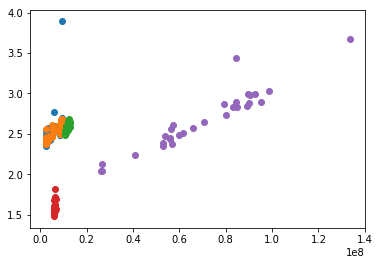

In [75]:
for i in range(5):
    m,b = fit_line(cols['metric'][i*30:(i+1)*30], cols['time'][i*30:(i+1)*30])
    plt.scatter(cols['metric'][i*30:(i+1)*30], cols['time'][i*30:(i+1)*30])
plt.show()

In [28]:
random.seed(0)
# same window size but different regions
wr,wc = 100,100
for f in ['test01.txt', 'test02.txt','test03.txt','test04.txt','test05.txt']:
    for i in range(3):
        sr,sc = random.randint(wr,1000), random.randint(wc,1000)
        roff, coff = random.randint(0,sr-wr), random.randint(0, sc-wc)
        request_raytracer(f, sr, sc, wr, wc, roff, coff)

In [33]:
cols = pandas.read_csv('CNV/raytracer-master/stats.txt')
cols.head()['raytracerVectorinit']

0    150008
1    167936
2    491780
3    776987
4    726632
Name: raytracerVectorinit, dtype: int64

In [34]:
cols.head()['dot']

0     90002
1    103466
2    336983
3    481009
4    456247
Name: dot, dtype: int64

In [31]:
cols.corr()['instrs']

sc                                  -0.016247
sr                                   0.149883
wc                                        NaN
wr                                        NaN
coff                                 0.043463
roff                                 0.111942
size                                      NaN
instrs                               1.000000
raytracerpigmentsFinishinit          0.374162
findHit                              0.972558
raytracerLightinit                   0.535276
readVector                                NaN
raytracerAmbientLightinit                 NaN
raytracerRayinit                     0.972558
readPoint                            0.917286
debug                                     NaN
dot                                  0.994315
info                                      NaN
raytracerpigmentsSolidPigmentinit   -0.205838
draw                                      NaN
normalize                            0.986657
raytracerMatrixinit               

In [36]:
# warmup
wr,wc = 100,100
for f in ['test01.txt', 'test02.txt','test03.txt','test04.txt','test05.txt']:
    for i in range(30):
        sr,sc = random.randint(wr,1000), random.randint(wc,1000)
        roff, coff = random.randint(0,sr-wr), random.randint(0, sc-wc)
        request_raytracer(f, sr, sc, wr, wc, roff, coff)

random.seed(0)
wr,wc = 100,100
for f in ['test01.txt', 'test02.txt','test03.txt','test04.txt','test05.txt']:
    for i in range(3):
        sr,sc = random.randint(wr,1000), random.randint(wc,1000)
        roff, coff = random.randint(0,sr-wr), random.randint(0, sc-wc)
        request_raytracer(f, sr, sc, wr, wc, roff, coff)
        
times = pandas.read_csv('CNV/raytracer-master/stats.txt')

In [38]:
times = times[150:]

In [44]:
pandas.merge(cols, times).corr()['time']

sc                                  -0.139950
sr                                   0.080751
wc                                        NaN
wr                                        NaN
coff                                 0.218378
roff                                 0.015956
size                                      NaN
instrs                               0.310159
raytracerpigmentsFinishinit         -0.023150
findHit                              0.151193
raytracerLightinit                  -0.227866
readVector                                NaN
raytracerAmbientLightinit                 NaN
raytracerRayinit                     0.151193
readPoint                            0.517164
debug                                     NaN
dot                                  0.374658
info                                      NaN
raytracerpigmentsSolidPigmentinit    0.334364
draw                                      NaN
normalize                            0.251263
raytracerMatrixinit               

In [40]:
cols.corr()['time']

KeyError: 'time'